In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
df = pd.read_csv(DATA_URL + "video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


In [6]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [4]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [7]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [8]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


<Axes: xlabel='Year_of_Release'>

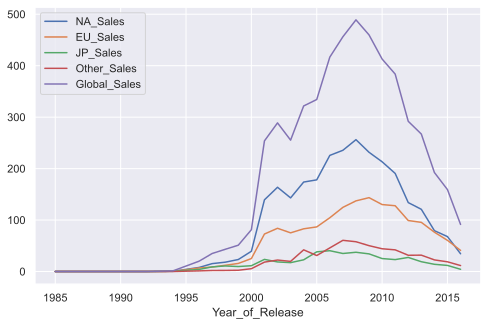

In [13]:
# plotting using df.plot()
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot()